In [47]:

import pandas as pd
import matplotlib.pyplot as plt

import warnings
pd.options.display.max_columns = 100
warnings.filterwarnings('ignore')
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

Создать приложение, которое будет из готового файла с данными «Сбербанка» (https://www.sberbank.com/ru/analytics/opendata) выводить результат по параметрам:
 Тип данных
 Интервал дат
 Область

Визуализировать выводимые данные с помощью графика

In [48]:
#Предварительно выгруженный датасет сохранила с кодировкой UTF-8
#Загрузим данные. Индекс = дата
data = pd.read_csv('opendata1.csv', sep = ',', encoding='utf-8', index_col='date')
data.head()

,name,region,value
date,,,
2013-01-15,Количество заявок на потребительские кредиты,Россия,571147
2013-02-15,Количество заявок на потребительские кредиты,Россия,504508
2013-03-15,Количество заявок на потребительские кредиты,Россия,628803
2013-04-15,Количество заявок на потребительские кредиты,Россия,836054
2013-05-15,Количество заявок на потребительские кредиты,Россия,867235


In [14]:
#Выгрузка всех значений статей
data['name'].unique()

array(['Количество заявок на потребительские кредиты',
       'Средняя сумма заявки на потребительский кредит',
       'Количество заявок на ипотечные кредиты',
       'Средняя сумма заявки на ипотечный кредит',
       'Количество новых депозитов', 'Средняя сумма нового депозита',
       'Средняя зарплата', 'Средняя пенсия',
       'В среднем руб. на текущем счете на человека',
       'В среднем депозитов в руб. на человека',
       'Средние расходы по картам', 'Средний чек в формате Фастфуд',
       'Средний чек в формате Ресторан',
       'Средние траты в ресторане фастфуд', 'Средние траты в ресторане'],
      dtype=object)

In [15]:
#Выгрузка всех регионов
data['region'].unique()

array(['Россия', 'Алтайский край', 'Амурская область',
       'Архангельская область', 'Астраханская область',
       'Белгородская область', 'Брянская область', 'Владимирская область',
       'Волгоградская область', 'Вологодская область',
       'Воронежская область', 'Еврейская автономная область',
       'Забайкальский край', 'Ивановская область', 'Иркутская область',
       'Кабардино-Балкарская Республика', 'Калининградская область',
       'Калужская область', 'Камчатский край', 'Кемеровская область',
       'Кировская область', 'Костромская область', 'Краснодарский край',
       'Красноярский край', 'Курганская область', 'Курская область',
       'Ленинградская область', 'Липецкая область', 'Магаданская область',
       'Москва', 'Московская область', 'Мурманская область',
       'Ненецкий автономный округ', 'Нижегородская область',
       'Новгородская область', 'Новосибирская область', 'Омская область',
       'Оренбургская область', 'Орловская область', 'Пензенская область',

In [23]:
#Конвертировали индекс в формат дат
data.index = pd.to_datetime(data.index)

In [24]:
data.index

DatetimeIndex(['2013-01-15', '2013-02-15', '2013-03-15', '2013-04-15',
               '2013-05-15', '2013-06-15', '2013-07-15', '2013-08-15',
               '2013-09-15', '2013-10-15',
               ...
               '2018-02-15', '2018-03-15', '2018-04-15', '2018-05-15',
               '2018-06-15', '2018-07-15', '2018-08-15', '2018-09-15',
               '2018-10-15', '2018-11-15'],
              dtype='datetime64[ns]', name='date', length=74842, freq=None)

In [32]:
#Здесь задаем нужные параметры графика
ARTICLE = 'Средние расходы по картам'
REGION = 'Россия'
START = '2015-01-15'
STOP = '2018-12-15'

In [35]:
#Обрезка выборки
sber = data.loc[(data['region'] == REGION) & (data['name'] == ARTICLE), :]
sber.head()

,name,region,value
date,,,
2014-01-15,Средние расходы по картам,Россия,6936
2014-02-15,Средние расходы по картам,Россия,6344
2014-03-15,Средние расходы по картам,Россия,7405
2014-04-15,Средние расходы по картам,Россия,6969
2014-05-15,Средние расходы по картам,Россия,7353


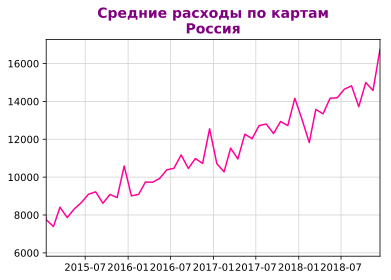

In [46]:
№Построение графика по параметрам.
plt.plot(sber.index, sber['value'], color='#FF0099' )
plt.title(ARTICLE+'\n'+REGION, fontsize=14, fontweight='bold', color='Purple')
plt.xlim(START, STOP)
plt.grid(color='lightgrey')